In [63]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
df_creditCard=pd.read_csv('/Users/venka/OneDrive/Desktop/Project/Datasets/Train Dataset.csv')

In [33]:
df_creditCard.head(7)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [34]:
df_creditCard.shape

(94936, 31)

In [35]:
#df_creditCard.info()

In [36]:
df_creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,...,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000,94936.000000
mean,41163.853438,-0.263647,-0.038030,0.676523,0.162230,-0.279654,0.093520,-0.107574,0.054661,-0.038638,...,-0.030231,-0.107353,-0.037435,0.009701,0.132034,0.026838,0.000265,0.001431,98.767564,0.002286
std,16558.505446,1.867812,1.662361,1.336471,1.353174,1.365457,1.302849,1.222186,1.209095,1.128260,...,0.722180,0.634811,0.640870,0.594396,0.442022,0.495477,0.396814,0.328344,267.578704,0.047755
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32888.750000,-1.028360,-0.603849,0.178350,-0.716346,-0.898413,-0.647435,-0.600370,-0.138884,-0.697523,...,-0.224356,-0.528940,-0.177223,-0.322545,-0.132487,-0.325550,-0.062959,-0.005618,7.580000,0.000000
50%,43221.000000,-0.259878,0.074272,0.756526,0.188786,-0.314398,-0.157014,-0.069027,0.072451,-0.112180,...,-0.057602,-0.082306,-0.049611,0.064962,0.170332,-0.070483,0.009596,0.023279,26.720000,0.000000
75%,54201.250000,1.153147,0.731377,1.380242,1.032560,0.250931,0.486414,0.416268,0.357283,0.571771,...,0.119901,0.310231,0.081566,0.406312,0.419745,0.303345,0.082748,0.076399,89.900000,0.000000
max,65096.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [37]:
df_features = df_creditCard.drop('Class', axis=1)

In [38]:
scaler = StandardScaler()
df_scalled_Data = scaler.fit_transform(df_creditCard)
     

In [39]:
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(df_scalled_Data)

In [40]:
df_scalled_Data

array([[-2.4859774 , -0.58687166, -0.0209049 , ..., -0.06847893,
         0.19004765, -0.04786426],
       [-2.4859774 ,  0.77926016,  0.182982  , ...,  0.04048429,
        -0.35906471, -0.04786426],
       [-2.485917  , -0.5860937 , -0.78330754, ..., -0.18634007,
         1.04602461, -0.04786426],
       ...,
       [ 1.44525559,  0.81941563,  0.19996625, ...,  0.05578328,
        -0.35192659, -0.04786426],
       [ 1.44531598, -0.16973839, -0.13870619, ..., -0.27759869,
         0.5711338 , -0.04786426],
       [ 1.44531598, -0.04705868, -0.15815918, ..., -0.38697178,
        -0.28525426, -0.04786426]])

In [67]:
pca_data.shape

(94936, 2)

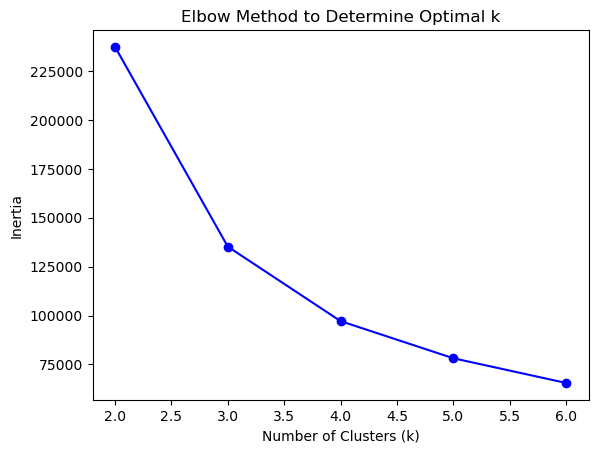

In [41]:
distance_to_Centroid=[]
k_values=range(2,7)
for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=42)  # K means object creation
    kmeans.fit(pca_data)
    distance_to_Centroid.append(kmeans.inertia_)


plt.plot(k_values, distance_to_Centroid, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [42]:
 kmeans_valid = KMeans(n_clusters=6,random_state=42)
cluster_labels = kmeans_valid.fit_predict(pca_data)

In [43]:
kmeans_valid.fit(pca_data)

KMeans(n_clusters=6, random_state=42)

In [44]:

kmeans_valid

KMeans(n_clusters=6, random_state=42)

In [45]:
kmeans_valid.labels_
     

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

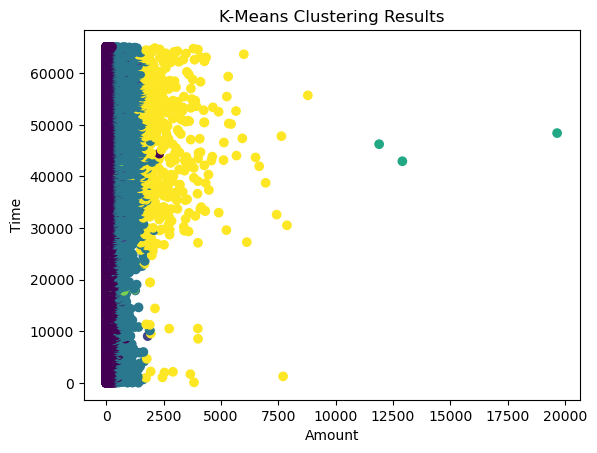

In [46]:
# prompt: plot the data

import matplotlib.pyplot as plt
plt.scatter(df_creditCard['Amount'], df_creditCard['Time'], c=kmeans_valid.labels_)
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('K-Means Clustering Results')
plt.show()

In [47]:
cluster_centers = kmeans_valid.cluster_centers_

In [48]:
cluster_labels=kmeans_valid.predict(pca_data)
from numpy.linalg import norm
centroids = kmeans_valid.cluster_centers_
distances = np.array([
    norm(pca_data[i] - centroids[cluster_labels[i]])
    for i in range(len(pca_data))
])
df_creditCard['DistanceToCentroid'] = distances

df_creditCard['Cluster'] = cluster_labels
df_creditCard['PCA1'] = pca_data[:, 0]
df_creditCard['PCA2'] = pca_data[:, 1]
df_creditCard['Anomaly'] = df_creditCard['DistanceToCentroid'] > threshold_distance



In [49]:
cluster_centers

array([[-0.11936896, -0.24483682],
       [20.44561956, -3.54151099],
       [ 0.44896381,  2.84289436],
       [12.8859006 , 77.92487896],
       [40.98262715, -5.9980662 ],
       [ 2.11864675, 12.86748068]])

In [50]:
df_creditCard_2d = pca_data
    
distances = [np.linalg.norm(x - cluster_centers[cluster]) for x, cluster in zip(df_creditCard_2d, cluster_labels)]

In [51]:
percentile_threshold = 95   # thresold  % distance the boundry of legit data point
threshold_distance = np.percentile(distances, percentile_threshold)   # Sets boundary

In [52]:
# Identify anomalies
anomalies = [df_creditCard_2d[i] for i, distance in enumerate(distances) if distance > threshold_distance]
anomalies = np.asarray(anomalies, dtype=np.float32)

In [53]:
# Add anomaly info to training DataFrame
df_creditCard['Cluster'] = cluster_labels
df_creditCard['DistanceToCentroid'] = distances
df_creditCard['Anomaly'] = df_creditCard['DistanceToCentroid'] > threshold_distance

# Now print the anomaly count
print("Train Dataset anomalies:", df_creditCard['Anomaly'].sum())

Train Dataset anomalies: 4747


In [54]:
# Tensorflow
# input dimension
input_dim = df_scalled_Data.shape[1]
encoding_dim = 14  # Tunable
# Build the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer) #tunable ('tanh' or 'sigmoid')
decoded = Dense(input_dim, activation='sigmoid')(encoded)#tunable ('linear' or 'relu')

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')#tunable (optimizer:'rmsdrop' or 'SGD') (loss:'mae')

#Training
history = autoencoder.fit(
    df_scalled_Data, df_scalled_Data,
    epochs=50,#tunable 
    batch_size=32,#tunable
    shuffle=True,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.8735 - val_loss: 0.7012
Epoch 2/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7812 - val_loss: 0.6663
Epoch 3/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7674 - val_loss: 0.6562
Epoch 4/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7622 - val_loss: 0.6509
Epoch 5/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7591 - val_loss: 0.6474
Epoch 6/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7568 - val_loss: 0.6452
Epoch 7/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7552 - val_loss: 0.6403
Epoch 8/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7538 - val_loss: 0.6394
Epoch 9/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7528 - val_loss: 0.6384
Epoch 10/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7520 - val_loss: 0.6378
Epoch 11/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7514 - val_loss: 0.6368
Epoch 12/50
2671/2671 ━━━━━━━

In [55]:
reconstructed = autoencoder.predict(df_scalled_Data)
mse = np.mean(np.power(df_scalled_Data - reconstructed, 2), axis=1)

2967/2967 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [56]:
threshold_ae = np.percentile(mse, 95)  # Top 5% as anomalies
df_creditCard['ReconstructionError'] = mse
df_creditCard['AE_Anomaly'] = mse > threshold_ae

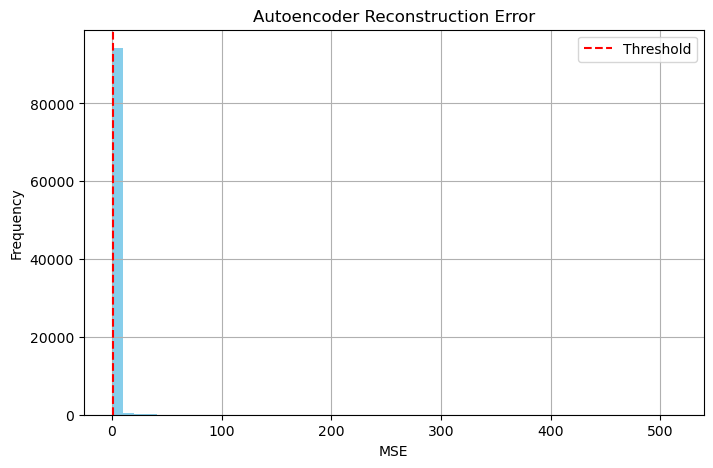

In [57]:
plt.figure(figsize=(8, 5))
plt.hist(mse, bins=50, color='skyblue')
plt.axvline(threshold_ae, color='red', linestyle='--', label='Threshold')
plt.title('Autoencoder Reconstruction Error')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

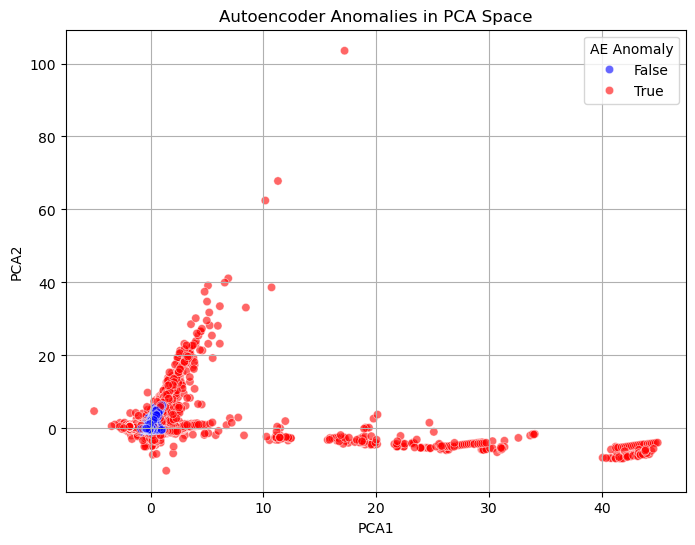

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_creditCard, hue='AE_Anomaly', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Autoencoder Anomalies in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='AE Anomaly')
plt.grid(True)
plt.show()

<Axes: xlabel='PCA1', ylabel='PCA2'>

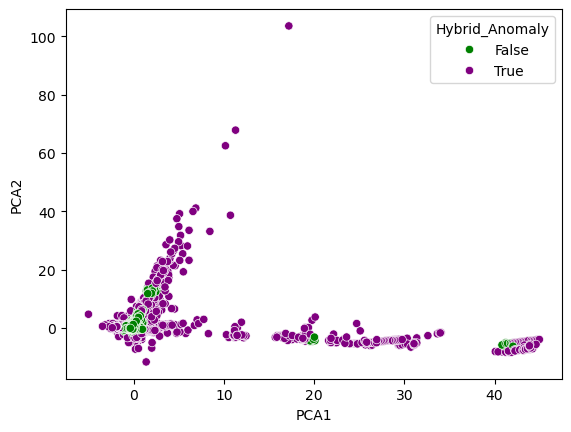

In [66]:
sns.scatterplot(x='PCA1', y='PCA2', data=df_creditCard, hue='Hybrid_Anomaly', palette={0: 'green', 1: 'purple'})

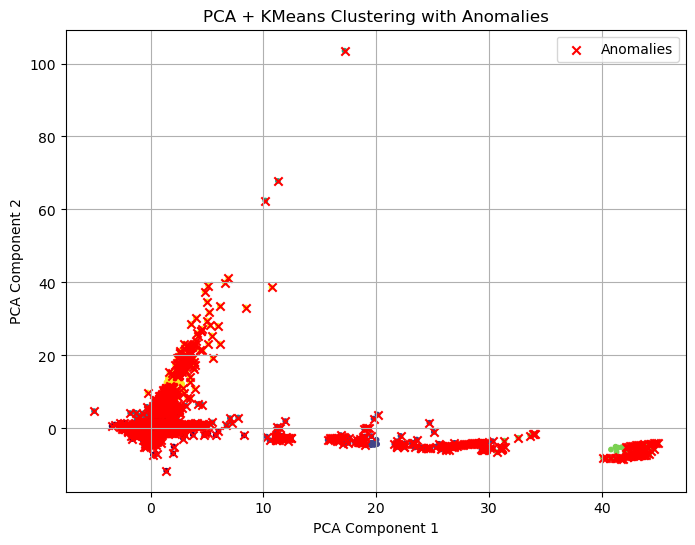

In [ ]:


plt.figure(figsize=(8, 6))
plt.scatter(df_creditCard['PCA1'], df_creditCard['PCA2'], c=cluster_labels, cmap='viridis', s=10)
plt.scatter(
    df_creditCard[df_creditCard['Anomaly']]['PCA1'],
    df_creditCard[df_creditCard['Anomaly']]['PCA2'],
    c='red', marker='x', label='Anomalies'
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA + KMeans Clustering with Anomalies')
plt.legend()
plt.grid(True)
plt.show()



Test Dataset 1 anomalies: 4747
--- Test Dataset 1 Clustering Metrics ---
Silhouette Coefficient: 0.7583496126627064
Calinski-Harabasz Index: 89451.71534397779
Davies-Bouldin Index: 0.47694336092681927


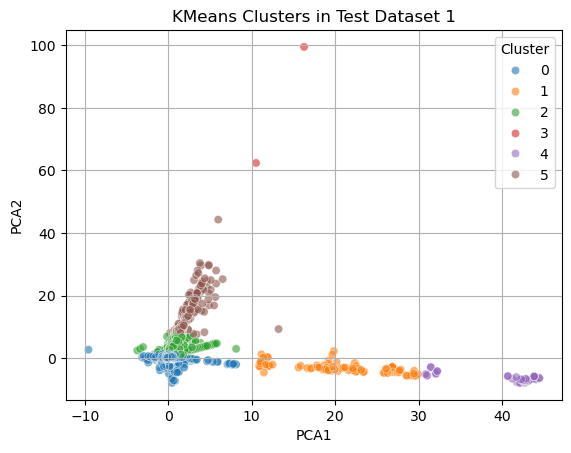

In [ ]:
# Test Dataset 1
test_data_1 = pd.read_csv('/Users/venka/OneDrive/Desktop/Project/Datasets/Test Dataset-1.csv')
test_features_1 = test_data_1.select_dtypes(include=[np.number])
test_scaled_1 = scaler.transform(test_features_1)
test_pca_1 = pca.transform(test_scaled_1)

test_labels_1 = kmeans_valid.predict(test_pca_1)
#test_distances_1 = [np.linalg.norm(x - cluster_centers[c]) for x, c in zip(test_pca_1, test_labels_1)]


test_distances_1 = np.array([
    np.linalg.norm(x - kmeans_valid.cluster_centers_[c])
    for x, c in zip(test_pca_1, test_labels_1)
])
threshold_distance = np.percentile(test_distances_1, 95)

test_data_1['Cluster'] = test_labels_1
test_data_1['DistanceToCentroid'] = test_distances_1
test_data_1['Anomaly'] = test_data_1['DistanceToCentroid'] > threshold_distance

test_data_1['PCA1'] = test_pca_1[:, 0]
test_data_1['PCA2'] = test_pca_1[:, 1]
print("Test Dataset 1 anomalies:", test_data_1['Anomaly'].sum())
print("--- Test Dataset 1 Clustering Metrics ---")
print("Silhouette Coefficient:", silhouette_score(test_pca_1, test_labels_1))
print("Calinski-Harabasz Index:", calinski_harabasz_score(test_pca_1, test_labels_1))
print("Davies-Bouldin Index:", davies_bouldin_score(test_pca_1, test_labels_1))

sns.scatterplot(x='PCA1', y='PCA2', data=test_data_1, hue='Cluster', palette='tab10', alpha=0.6)
plt.title('KMeans Clusters in Test Dataset 1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()






Test Dataset 2 anomalies: 4747
--- Test Dataset 2 Clustering Metrics ---
Silhouette Coefficient: 0.7225337785484569
Calinski-Harabasz Index: 72486.59958017193
Davies-Bouldin Index: 0.545424539624314


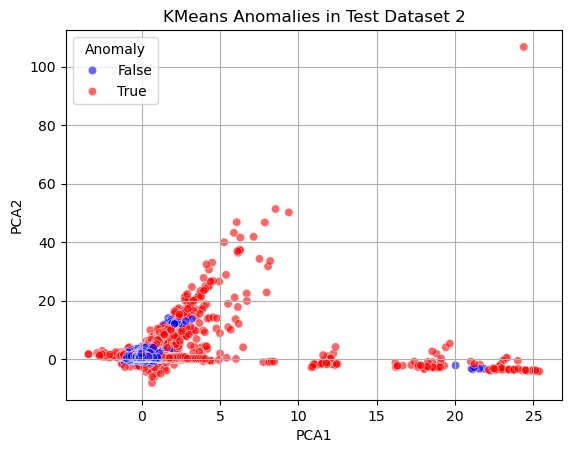

In [ ]:
# Test Dataset 2
test_data_2 = pd.read_csv('/Users/venka/OneDrive/Desktop/Project/Datasets/Test Dataset-2.csv')
test_features_2 = test_data_2.select_dtypes(include=[np.number])
test_scaled_2 = scaler.transform(test_features_2)
test_pca_2 = pca.transform(test_scaled_2)

test_labels_2 = kmeans_valid.predict(test_pca_2)
test_distances_2 = np.array([
    np.linalg.norm(x - kmeans_valid.cluster_centers_[c])
    for x, c in zip(test_pca_2, test_labels_2)
])
threshold_distance = np.percentile(test_distances_2, 95)

test_data_2['Cluster'] = test_labels_2
test_data_2['DistanceToCentroid'] = test_distances_2
test_data_2['Anomaly'] = test_data_2['DistanceToCentroid'] > threshold_distance
test_data_2['PCA1'] = test_pca_2[:, 0]
test_data_2['PCA2'] = test_pca_2[:, 1]

print("Test Dataset 2 anomalies:", test_data_2['Anomaly'].sum())

print("--- Test Dataset 2 Clustering Metrics ---")
print("Silhouette Coefficient:", silhouette_score(test_pca_2, test_labels_2))
print("Calinski-Harabasz Index:", calinski_harabasz_score(test_pca_2, test_labels_2))
print("Davies-Bouldin Index:", davies_bouldin_score(test_pca_2, test_labels_2))

sns.scatterplot(x='PCA1', y='PCA2', data=test_data_2, hue='Anomaly', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('KMeans Anomalies in Test Dataset 2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()


In [61]:
df_creditCard['Hybrid_Anomaly'] = df_creditCard['Anomaly'] & df_creditCard['AE_Anomaly']

print("KMeans anomalies:", df_creditCard['Anomaly'].sum())
print("Autoencoder anomalies:", df_creditCard['AE_Anomaly'].sum())
print("Overlap (Hybrid anomalies):", df_creditCard['Hybrid_Anomaly'].sum())

KMeans anomalies: 4747
Autoencoder anomalies: 4747
Overlap (Hybrid anomalies): 2037


In [62]:
#Metrics for K-means
sil_score = silhouette_score(pca_data, cluster_labels)
ch_score = calinski_harabasz_score(pca_data, cluster_labels)
db_score = davies_bouldin_score(pca_data, cluster_labels)

print("\n--- Clustering Evaluation Metrics ---")
print(f"Silhouette Coefficient: {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")



--- Clustering Evaluation Metrics ---
Silhouette Coefficient: 0.7739
Calinski-Harabasz Index: 107154.12
Davies-Bouldin Index: 0.4667


In [64]:
#Metrics for Autoencoders
y_true = df_creditCard['Class']
y_pred = df_creditCard['AE_Anomaly'].astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, df_creditCard['ReconstructionError'])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Precision: 0.0457
Recall: 1.0000
F1-score: 0.0874
ROC-AUC: 0.9983
